In [2]:
import pandas as pd
df=pd.read_csv("titanic.csv")
df=df.fillna(30)

In [3]:
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,30,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,30,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,30,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,30,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,30.0,1,2,W./C. 6607,23.4500,30,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [6]:
x=df.drop(["PassengerId","Name","SibSp","Ticket","Cabin","Embarked","Survived"],axis="columns")

In [7]:
y=df["Survived"]

In [8]:
x

,Pclass,Sex,Age,Parch,Fare
0,3,male,22.0,0,7.2500
1,1,female,38.0,0,71.2833
2,3,female,26.0,0,7.9250
3,1,female,35.0,0,53.1000
4,3,male,35.0,0,8.0500
...,...,...,...,...,...
886,2,male,27.0,0,13.0000
887,1,female,19.0,0,30.0000
888,3,female,30.0,2,23.4500
889,1,male,26.0,0,30.0000


In [10]:
dummies=pd.get_dummies(df["Sex"])
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [22]:
new_x=x.drop(["male","female"],axis="columns")

In [23]:
new_input=pd.concat([new_x,dummies],axis="columns")

In [24]:
new_input

,Pclass,Sex,Age,Parch,Fare,female,male
0,3,male,22.0,0,7.2500,0,1
1,1,female,38.0,0,71.2833,1,0
2,3,female,26.0,0,7.9250,1,0
3,1,female,35.0,0,53.1000,1,0
4,3,male,35.0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,male,27.0,0,13.0000,0,1
887,1,female,19.0,0,30.0000,1,0
888,3,female,30.0,2,23.4500,1,0
889,1,male,26.0,0,30.0000,0,1


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(new_input,y,test_size=0.2)


In [33]:
len(X_test)

179

In [35]:
len(y_train)

712

In [36]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [39]:
model.score(X_test,y_test)*100

79.3296089385475

In [43]:
model.predict(X_test[:10])

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[97, 19],
       [18, 45]], dtype=int64)

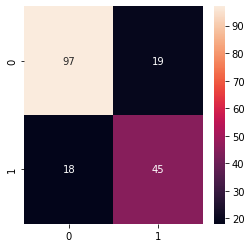

In [47]:
plt.figure(figsize=(4,4))
sn.heatmap(cm,annot=True)
plt.show()